# 241015 - REG

In [69]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Multi-Linear Regression

In [70]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

from stargazer.stargazer import Stargazer

In [71]:
dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iM_alphaco/data_set/boston.csv')
dat.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [72]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [73]:
def fill_na_means(df):
  df = df.apply(lambda col : col.fillna(col.mean()))
  return df

dat = fill_na_means(dat)
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


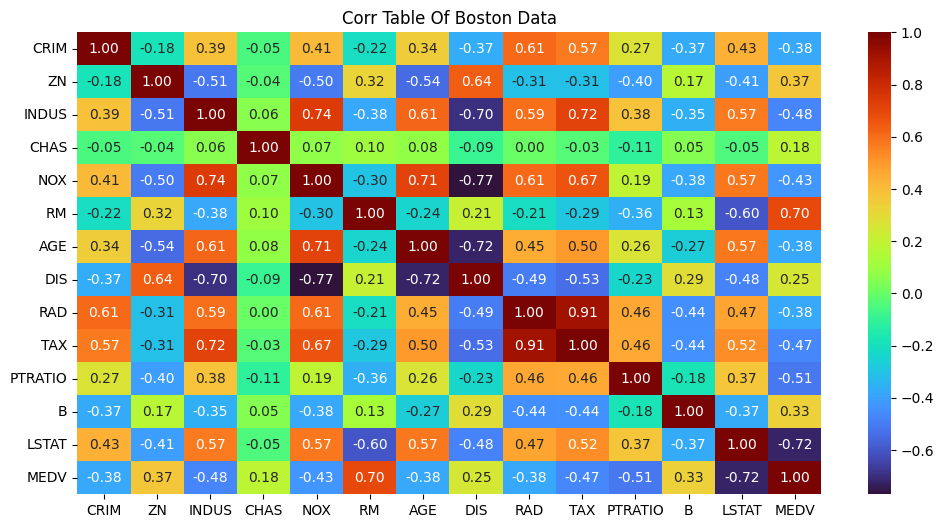

In [74]:
# check with corr map
# 상관계수가 0.8 이상이면 다중공산성 문제가 발생할 가능성이 있다!

import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = dat.corr()

plt.figure(figsize = (12,6))
sns.heatmap(corr_mat, annot = True, cmap = 'turbo', fmt = '.2f')
plt.title("Corr Table Of Boston Data")
plt.show()

In [75]:
# col drop based on corr_mat

dat2 = dat.drop(['CHAS', 'RAD'], axis = 1)
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    int64  
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 47.6 KB


In [76]:
res1 = ols('MEDV~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = dat).fit()
res2 = ols('MEDV~ CRIM + ZN  + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data = dat).fit()
res3 = ols('MEDV~ CRIM + ZN  + CHAS + NOX + DIS + RAD + TAX + PTRATIO + B ', data = dat).fit()

In [77]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     121.9
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          4.81e-133
Time:                        02:37:34   Log-Likelihood:                -1508.2
No. Observations:                 506   AIC:                             3040.
Df Residuals:                     494   BIC:                             3091.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.3481      5.152      6.667      0.000      24.225      44.471
CRIM          -0.1106      0.033     -3.358      0.001      -0.175      -0.046
ZN             0.0425      0.014      3.113      0.002       0.016       0.069
CHAS           2.9570      0.880      3.359      0.001       1.227       4.687
NOX          -18.0829      3.587     -5.041      0.000     -25.131     -11.035
RM             4.0807      0.408      9.996      0.000       3.279       4.883
DIS           -1.4164      0.185     -7.663      0.000      -1.780      -1.053
RAD            0.2840      0.065      4.402      0.000       0.157       0.411
TAX           -0.0117      0.003     -3.420      0.001      -0.018      -0.005
PTRATIO       -0.9472      0.132     -7.167      0.000      -1.207      -0.688
B              0.0093      0.003      3.397      0.001       0.004       0.015
LSTAT         -0.4783      0.048    -10.035      0.000      -0.572      -0.385
==============================================================================
Omnibus:                      185.060   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              866.153
Skew:                           1.564   Prob(JB):                    8.26e-189
Kurtosis:                       8.594   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
stargazer = Stargazer([res1, res2, res3])
stargazer

In [79]:
dat_a = dat.loc[:, ['CRIM','ZN', 'NOX', 'MEDV', "INDUS", "RM"]]
dat_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   NOX     506 non-null    float64
 3   MEDV    506 non-null    float64
 4   INDUS   506 non-null    float64
 5   RM      506 non-null    float64
dtypes: float64(6)
memory usage: 23.8 KB


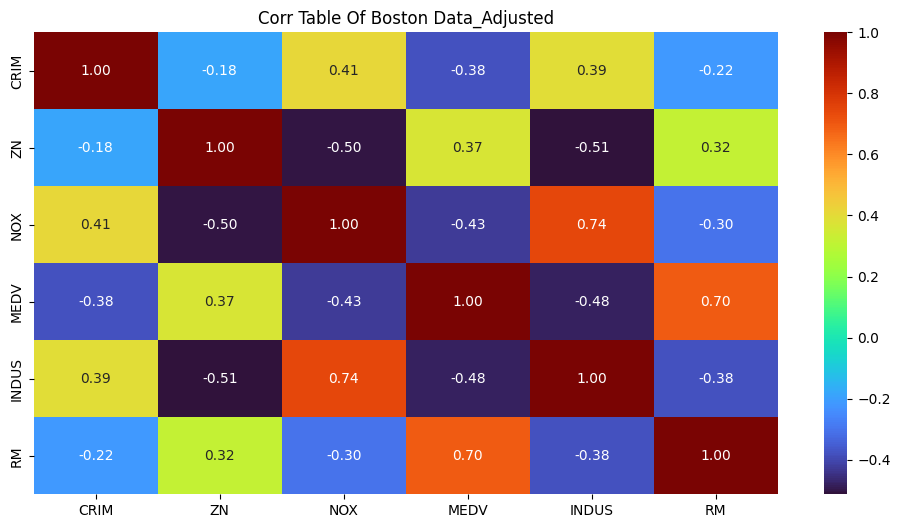

In [80]:
corr_mat = dat_a.corr()

plt.figure(figsize = (12,6))
sns.heatmap(corr_mat, annot = True, cmap = 'turbo', fmt = '.2f')
plt.title("Corr Table Of Boston Data_Adjusted")
plt.show()

In [81]:
import statsmodels.formula.api as smf

res4 = ols('MEDV~ CRIM + ZN + INDUS + NOX + RM', data = dat).fit()
res5 = ols('MEDV~ CRIM + ZN + INDUS  + RM', data = dat).fit()
res6 = ols('MEDV~ CRIM + INDUS + NOX + RM', data = dat).fit()
res7 = ols('MEDV~ CRIM + INDUS + RM', data = dat).fit()
res_scaled = ols('MEDV~ scale(CRIM) + scale(INDUS) + scale(NOX) + scale(RM)', data = dat).fit()

In [82]:
stargazer = Stargazer([res4, res5, res6, res7, res_scaled])
# 모델 3 채택
stargazer

# 다중공산성 문제
- VIF 확인

In [83]:
# 다중곤산성은 비즈니스적으로 변수의 사용을 결정해야 한다!

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = dat.iloc[:, :-1]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values("VIF").reset_index(drop=True)

,feature,VIF
0,CHAS,1.149619
1,CRIM,2.021270
2,ZN,2.690726
3,LSTAT,10.516244
4,INDUS,13.582348
5,DIS,13.833517
6,RAD,15.094122
7,AGE,19.805308
8,B,20.144260
9,TAX,60.597824


## 해결방법
- 정규화
- PCA

In [84]:
import statsmodels.formula.api as smf
import numpy as np

formula = "MEDV ~ scale(CRIM) + scale(ZN) + scale(INDUS) + scale(RM) + scale(NOX)"
model = smf.ols(formula, data = dat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     132.9
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.10e-89
Time:                        02:37:35   Log-Likelihood:                -1626.3
No. Observations:                 506   AIC:                             3265.
Df Residuals:                     500   BIC:                             3290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.5328      0.269     83.687   

# Odds & 로지스틱 회귀

In [97]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit

# Load the tips dataset
tips = sns.load_dataset('tips')

# Convert categorical columns to numeric using pd.get_dummies
tips['sex'] = tips['sex'].map({'Male': 1.0, 'Female': 0.0}).astype(float)
tips['smoker'] = tips['smoker'].map({'Yes': 1.0, 'No': 0.0}).astype(float)

model = logit('smoker ~ sex + total_bill', data = tips).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.660940
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                  244
Model:                          Logit   Df Residuals:                      241
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                0.005541
Time:                        03:50:11   Log-Likelihood:                -161.27
converged:                       True   LL-Null:                       -162.17
Covariance Type:            nonrobust   LLR p-value:                    0.4072
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8552      0.351     -2.435      0.015      -1.544      -0.167
sex           -0.0422      0.

In [99]:
model = logit('smoker ~ tip + total_bill', data = tips).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.658528
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                  244
Model:                          Logit   Df Residuals:                      241
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                0.009171
Time:                        03:51:30   Log-Likelihood:                -160.68
converged:                       True   LL-Null:                       -162.17
Covariance Type:            nonrobust   LLR p-value:                    0.2260
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7461      0.345     -2.161      0.031      -1.423      -0.069
tip           -0.1421      0.

# eel 데이터셋 활용

## 데이터 가져오기부터

In [91]:
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/iM_alphaco/data_set'

eel = pd.read_csv(DATA_PATH + "/eel.csv")
eel.head()

,id,cured,intervention,duration
0,ga442,Not cured,No treatment,7
1,y024o,Not cured,No treatment,7
2,9k65h,Not cured,No treatment,6
3,lqx1y,Cured,No treatment,8
4,p7415,Cured,Intervention,7


In [92]:
# Map the categorical columns to numeric values
eel['cured'] = eel['cured'].map({'Cured': 1.0, 'Not cured': 0.0})
eel['intervention'] = eel['intervention'].map({'Intervention': 1.0, 'No treatment': 0.0})

eel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            113 non-null    object 
 1   cured         113 non-null    float64
 2   intervention  113 non-null    float64
 3   duration      113 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ KB


## 기저모형 만들기

In [93]:
model1 = logit('cured ~ 1', data=eel).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.681788
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  cured   No. Observations:                  113
Model:                          Logit   Df Residuals:                      112
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:               2.761e-13
Time:                        02:39:48   Log-Likelihood:                -77.042
converged:                       True   LL-Null:                       -77.042
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3032      0.190      1.593      0.111      -0.070       0.676


## 새모형 만들기

In [94]:
model2 = logit('cured ~ intervention', data=eel).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.637866
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  cured   No. Observations:                  113
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.06442
Time:                        02:40:12   Log-Likelihood:                -72.079
converged:                       True   LL-Null:                       -77.042
Covariance Type:            nonrobust   LLR p-value:                  0.001629
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2877      0.270     -1.065      0.287      -0.817       0.242
intervention     1.2287

## 잔차 이탈도 (-2LL)

In [95]:
LL = model1.llf
print(LL)
print(-2 * LL)

-77.0420024476993
154.0840048953986


In [96]:
LL2 = model2.llf
print(LL2)
print(-2 * LL2)

# -2LL인 이탈도가 10정도 줄어들었기 때문에, model2가 더 좋은 모델이라고 해석할 수 있다.

-72.07890183908266
144.15780367816532


In [100]:
import scipy.stats as stats

def calculate_p_value(chi_square_score, dof):
  p_value = 1 - stats.chi2.cdf(chi_square_score, dof)
  return p_value

In [101]:
# Given chi-square score and degrees of freedom
chi_square_score = -2 * model1.llf - -2 * model2.llf
print(chi_square_score)
degrees_of_freedom = 1  # Adjust this based on your specific test setup

# Calculate the p-value
p_value = calculate_p_value(chi_square_score, degrees_of_freedom)
print(f"P-Value: {p_value}")

# it statistically significant

9.926201217233285
P-Value: 0.0016294247429310404


# Loan_data
- loan_status의 1은 대출 거절된 사람, 0은 재출 합격한 사람

In [103]:
loan_data = pd.read_csv(DATA_PATH + "/cleaned_loan_data.csv")
loan_data.head()

,loan_status,loan_amnt,grade,home_ownership,annual_inc,age,emp_cat,ir_cat
0,0,5000,B,RENT,24000.0,33,0-15,8-11
1,0,2400,C,RENT,12252.0,31,15-30,Missing
2,0,10000,C,RENT,49200.0,24,0-15,11-13.5
3,0,5000,A,RENT,36000.0,39,0-15,Missing
4,0,3000,E,RENT,48000.0,24,0-15,Missing


In [104]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29091 entries, 0 to 29090
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_status     29091 non-null  int64  
 1   loan_amnt       29091 non-null  int64  
 2   grade           29091 non-null  object 
 3   home_ownership  29091 non-null  object 
 4   annual_inc      29091 non-null  float64
 5   age             29091 non-null  int64  
 6   emp_cat         29091 non-null  object 
 7   ir_cat          29091 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.8+ MB


In [105]:
loan_data.describe()

,loan_status,loan_amnt,annual_inc,age
count,29091.000000,29091.000000,2.909100e+04,29091.000000
mean,0.110928,9593.663848,6.696489e+04,27.698120
std,0.314048,6323.467488,5.325318e+04,6.194617
min,0.000000,500.000000,4.000000e+03,20.000000
25%,0.000000,5000.000000,4.000000e+04,23.000000
50%,0.000000,8000.000000,5.640000e+04,26.000000
75%,0.000000,12250.000000,8.000000e+04,30.000000
max,1.000000,35000.000000,2.039784e+06,94.000000


<Axes: xlabel='grade', ylabel='count'>

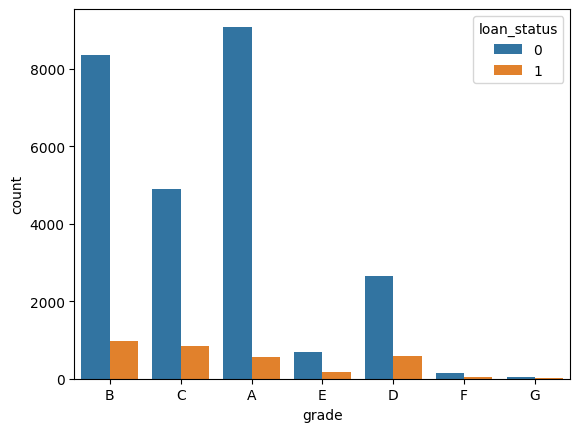

In [106]:
sns.countplot(x = 'grade', hue = 'loan_status', data = loan_data)

In [109]:
loan_data['grade'] = loan_data['grade'].astype('category')
model = logit('loan_status ~ grade', data = loan_data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.337297
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                29091
Model:                          Logit   Df Residuals:                    29084
Method:                           MLE   Df Model:                            6
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.03201
Time:                        05:17:16   Log-Likelihood:                -9812.3
converged:                       True   LL-Null:                       -10137.
Covariance Type:            nonrobust   LLR p-value:                6.388e-137
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7774      0.043    -64.057      0.000      -2.862      -2.692
grade[T.B]     0.6408      0.

In [110]:
odds_ratios = pd.DataFrame({
    'coefficient': model.params,
    'Odds Ratio': model.params.apply(np.exp)
})

odds_ratios

# G등급은 A급에 의해 대출을 안 갚을 확률이 9.65배이다.

,coefficient,Odds Ratio
Intercept,-2.777444,0.062197
grade[T.B],0.640788,1.897976
grade[T.C],1.017994,2.767638
grade[T.D],1.257780,3.517604
grade[T.E],1.408342,4.089171
grade[T.F],1.759371,5.808781
grade[T.G],2.266619,9.646726


# chat_club data

In [113]:
chatup_data = pd.read_csv(DATA_PATH + '/Chat-Up Lines.dat', delimiter = '\t')

chatup_data.head()

,Success,Funny,Sex,Good_Mate,Gender
0,Get Phone Number,3,7,6,Male
1,Go Home with Person,5,7,2,Male
2,Get Phone Number,4,6,6,Male
3,Go Home with Person,3,7,5,Male
4,Get Phone Number,5,1,6,Male


In [120]:
chatup_data['success_cat'] = chatup_data['Success'].astype('category').cat.codes
chatup_data.head()

,Success,Funny,Sex,Good_Mate,Gender,sucess_cat,success_cat
0,Get Phone Number,3,7,6,Male,0,0
1,Go Home with Person,5,7,2,Male,1,1
2,Get Phone Number,4,6,6,Male,0,0
3,Go Home with Person,3,7,5,Male,1,1
4,Get Phone Number,5,1,6,Male,0,0


In [121]:
from statsmodels.formula.api import mnlogit # interaction Logit

model = mnlogit('success_cat ~ Good_Mate + Funny + C(Gender) + Sex + C(Gender):Sex + Funny:C(Gender)', data=chatup_data).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.851702
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:            success_cat   No. Observations:                 1020
Model:                        MNLogit   Df Residuals:                     1006
Method:                           MLE   Df Model:                           12
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                  0.1382
Time:                        05:33:33   Log-Likelihood:                -868.74
converged:                       True   LL-Null:                       -1008.0
Covariance Type:            nonrobust   LLR p-value:                 1.496e-52
          success_cat=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.4835      1.035     -6.265      0.000      -8.512   

- good_mate의 오즈비는 1이하: 감소한다.
---

- 남성은 여성보다 전화번호를 얻을 확률이 더 높긴 하지만, 상재적으로 상대갑오가 집에 갈 확률은 적다.

- 유머는 반비례적인 성격을 가진다.

- 남성이 성적인 농담을 할수록 상대방과 집에 갈 확률은 낮아지마, 여성은 성적인 농담을 하면 할수록 집에 갈 홯률이 높다.

- 즉, 남성과 여성의 암릐 차이가 있음을 알 수 있따.